In [2]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [3]:
accesscm2_pr_file = "data/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc"

In [4]:
dset = xr.open_dataset(accesscm2_pr_file)

In [5]:
print(dset['pr'])

<xarray.DataArray 'pr' (time: 60, lat: 144, lon: 192)>
[1658880 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    comment:        includes both liquid and solid phases
    cell_methods:   area: time: mean
    cell_measures:  area: areacella


In [6]:
clim = dset['pr'].mean('time', keep_attrs=True)
clim

<xarray.DataArray 'pr' (lat: 144, lon: 192)>
array([[1.8461452e-06, 1.9054805e-06, 1.9228980e-06, ..., 1.9869783e-06,
        2.0026005e-06, 1.9683730e-06],
       [1.9064508e-06, 1.9021350e-06, 1.8931637e-06, ..., 1.9433096e-06,
        1.9182237e-06, 1.9072245e-06],
       [2.1003202e-06, 2.0477617e-06, 2.0348527e-06, ..., 2.2391034e-06,
        2.1970161e-06, 2.1641599e-06],
       ...,
       [7.5109556e-06, 7.4777777e-06, 7.4689174e-06, ..., 7.3359679e-06,
        7.3987890e-06, 7.3978440e-06],
       [7.1837171e-06, 7.1722038e-06, 7.1926393e-06, ..., 7.1552149e-06,
        7.1576678e-06, 7.1592167e-06],
       [7.0353467e-06, 7.0403985e-06, 7.0326828e-06, ..., 7.0392648e-06,
        7.0387587e-06, 7.0304386e-06]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    comment:        includes both liquid and solid phases
    cell_methods:   area: time: mean
    cell_measures:  area: areacella

In [7]:
type(clim.data)

numpy.ndarray

In [8]:
clim.data = clim.data*86400
clim.attrs['units'] = 'mm/day'
clim

<xarray.DataArray 'pr' (lat: 144, lon: 192)>
array([[0.15950695, 0.16463352, 0.16613839, ..., 0.17167493, 0.17302468,
        0.17006743],
       [0.16471735, 0.16434446, 0.16356934, ..., 0.16790195, 0.16573453,
        0.1647842 ],
       [0.18146767, 0.17692661, 0.17581128, ..., 0.19345854, 0.18982219,
        0.18698342],
       ...,
       [0.64894656, 0.64607999, 0.64531446, ..., 0.63382763, 0.63925537,
        0.63917372],
       [0.62067316, 0.61967841, 0.62144403, ..., 0.61821057, 0.6184225 ,
        0.61855632],
       [0.60785395, 0.60829043, 0.60762379, ..., 0.60819248, 0.60814875,
        0.6074299 ]])
Coordinates:
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          mm/day
    comment:        includes both liquid and solid phases
    cell_methods:   area: time: mean
    cell_measures:  area: areacella

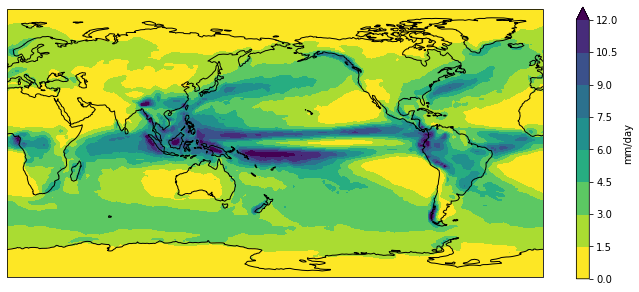

In [9]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

clim.plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap='viridis_r')
ax.coastlines()

plt.show()

In [10]:
import cmocean

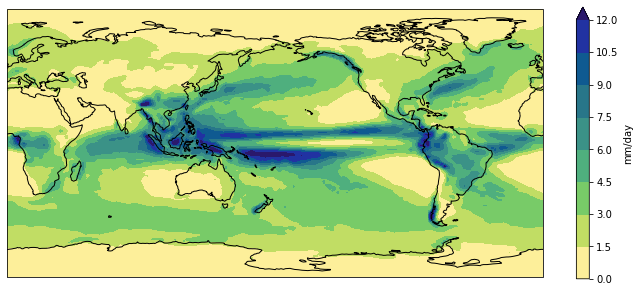

In [11]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

clim.plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap=cmocean.cm.haline_r)
ax.coastlines()

plt.show()

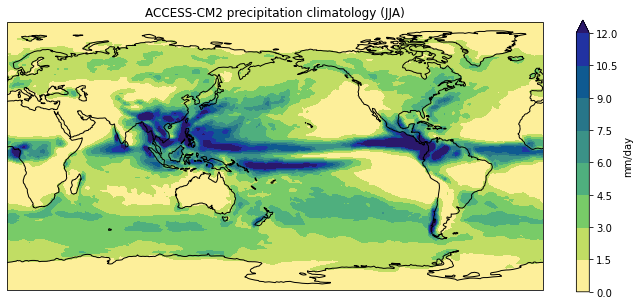

In [12]:
clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True)
clim.data = clim.data*86400
clim.attrs['units'] = 'mm/day'
JJA_dset = clim.sel(season='JJA')
data_source = dset.attrs['source_id']
title = "{} precipitation climatology (JJA)".format(data_source)
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
JJA_dset.plot.contourf(ax=ax,
                         levels=np.arange(0, 13.5, 1.5),
                         extend='max',
                         transform=ccrs.PlateCarree(),
                         cbar_kwargs={'label': clim.units},
                         cmap=cmocean.cm.haline_r)
ax.coastlines()
plt.title(title)

plt.show()
                                     

In [13]:
def plot_pr_climatology(pr_file, season, gridlines=False):
    """Plot the precipitation climatology.
    
    Args:
      pr_file (str): Precipitation data file
      season (str): Season (3 letter abbreviation, e.g. JJA)
      gridlines (bool): Select whether to plot gridlines , default is false
    
    """

    dset = xr.open_dataset(pr_file)

    clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True)

    clim.data = clim.data * 86400
    clim.attrs['units'] = 'mm/day'

    fig = plt.figure(figsize=[12,5])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
    clim.sel(season=season).plot.contourf(ax=ax,
                                          levels=np.arange(0, 13.5, 1.5),
                                          extend='max',
                                          transform=ccrs.PlateCarree(),
                                          cbar_kwargs={'label': clim.units},
                                          cmap=cmocean.cm.haline_r)
    ax.coastlines()
    if gridlines:
        plt.gca().gridlines()
    
    model = dset.attrs['source_id']
    title = f'{model} precipitation climatology ({season})'
    plt.title(title)

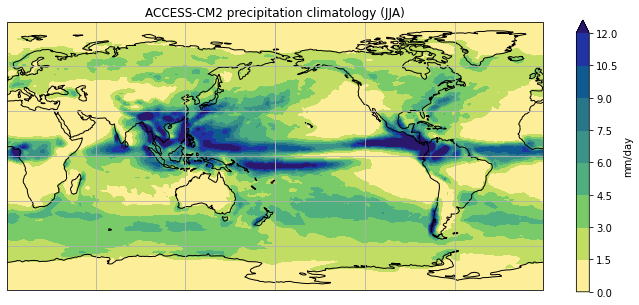

In [14]:
plot_pr_climatology(accesscm2_pr_file, 'JJA',True)

In [15]:
help(plot_pr_climatology)

Help on function plot_pr_climatology in module __main__:

plot_pr_climatology(pr_file, season, gridlines=False)
    Plot the precipitation climatology.
    
    Args:
      pr_file (str): Precipitation data file
      season (str): Season (3 letter abbreviation, e.g. JJA)
      gridlines (bool): Select whether to plot gridlines , default is false



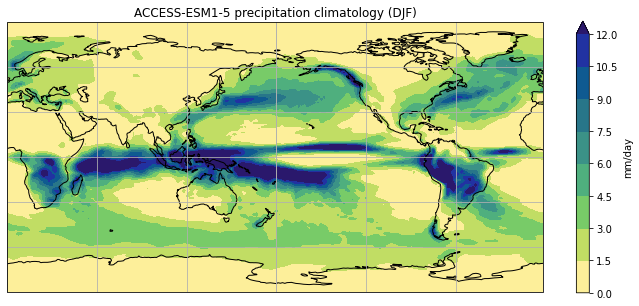

In [16]:
plot_pr_climatology('data/pr_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_201001-201412.nc', 'DJF',True)
plt.show()

In [17]:
clim

<xarray.DataArray 'pr' (season: 4, lat: 144, lon: 192)>
array([[[0.18113335, 0.1854766 , 0.18517073, ..., 0.18506073,
         0.18096387, 0.1744993 ],
        [0.20152785, 0.21175762, 0.21241893, ..., 0.21270524,
         0.20705407, 0.20452394],
        [0.22285438, 0.22073536, 0.22294326, ..., 0.22779685,
         0.22912482, 0.22882849],
        ...,
        [0.45903229, 0.46508337, 0.46356669, ..., 0.44000776,
         0.44780843, 0.4532414 ],
        [0.40746783, 0.40795511, 0.40711654, ..., 0.40664475,
         0.4066924 , 0.40704829],
        [0.34936184, 0.34888403, 0.34846209, ..., 0.34985776,
         0.34983183, 0.34982798]],

       [[0.13199658, 0.13640827, 0.13873266, ..., 0.14946386,
         0.15416825, 0.15272877],
        [0.13945687, 0.13602807, 0.13520381, ..., 0.13741687,
         0.13739142, 0.13702793],
        [0.16350112, 0.15960549, 0.15648004, ..., 0.17495734,
         0.17108457, 0.16746033],
...
        [0.53694353, 0.53872852, 0.54119248, ..., 0.52820771,
         0.53850987, 0.53220725],
        [0.52918427, 0.52958884, 0.5283477 , ..., 0.52541787,
         0.52955249, 0.53020334],
        [0.46829798, 0.47033344, 0.470564  , ..., 0.46692137,
         0.46740892, 0.46767739]],

       [[0.1220745 , 0.12544607, 0.12627103, ..., 0.12935785,
         0.12945963, 0.12797041],
        [0.1246888 , 0.12083483, 0.11932925, ..., 0.12858182,
         0.12677003, 0.12682772],
        [0.15612313, 0.14816019, 0.14792083, ..., 0.17328759,
         0.16653392, 0.16370486],
        ...,
        [0.66132407, 0.64295968, 0.63443317, ..., 0.63974673,
         0.64048806, 0.64025526],
        [0.57860949, 0.57454418, 0.57471517, ..., 0.57269298,
         0.57296267, 0.57471317],
        [0.56372131, 0.56337748, 0.56149768, ..., 0.56551164,
         0.56581229, 0.56423876]]])
Coordinates:
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          mm/day
    comment:        includes both liquid and solid phases
    cell_methods:   area: time: mean
    cell_measures:  area: areacella

In [18]:
dset['pr'].data

array([[[1.2344469e-06, 1.2264120e-06, 1.2741895e-06, ...,
         1.1328907e-06, 1.1245879e-06, 1.1333076e-06],
        [1.2631401e-06, 1.2673989e-06, 1.3493105e-06, ...,
         1.0690576e-06, 1.1324578e-06, 1.2358810e-06],
        [1.7761749e-06, 1.6147205e-06, 1.5170916e-06, ...,
         1.6539618e-06, 1.9143638e-06, 1.7022937e-06],
        ...,
        [6.5203608e-06, 6.2248882e-06, 5.9232711e-06, ...,
         6.6213966e-06, 6.7568908e-06, 6.7033543e-06],
        [6.1826654e-06, 6.0271282e-06, 5.9090694e-06, ...,
         6.6694661e-06, 6.5114336e-06, 6.3665802e-06],
        [5.0731064e-06, 5.0566282e-06, 5.0496801e-06, ...,
         5.1481870e-06, 5.1208062e-06, 5.0938042e-06]],

       [[2.8637878e-06, 2.9543310e-06, 2.9625007e-06, ...,
         2.8216714e-06, 2.8398588e-06, 2.7785497e-06],
        [1.9568502e-06, 1.9419142e-06, 1.9260340e-06, ...,
         2.1125311e-06, 2.0625557e-06, 2.0204272e-06],
        [1.1049092e-06, 1.0645476e-06, 1.0278521e-06, ...,
         1.250

In [ ]:
print()